# fashion_mnist_example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

tf.random.set_seed(0)

In [2]:
# load fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(f"{X_train.shape=} {y_train.shape=} {X_test.shape=} {y_test.shape=}")

X_train.shape=(60000, 28, 28) y_train.shape=(60000,) X_test.shape=(10000, 28, 28) y_test.shape=(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Normalize image data
X_train = X_train / 255.0
X_test = X_test / 255.0

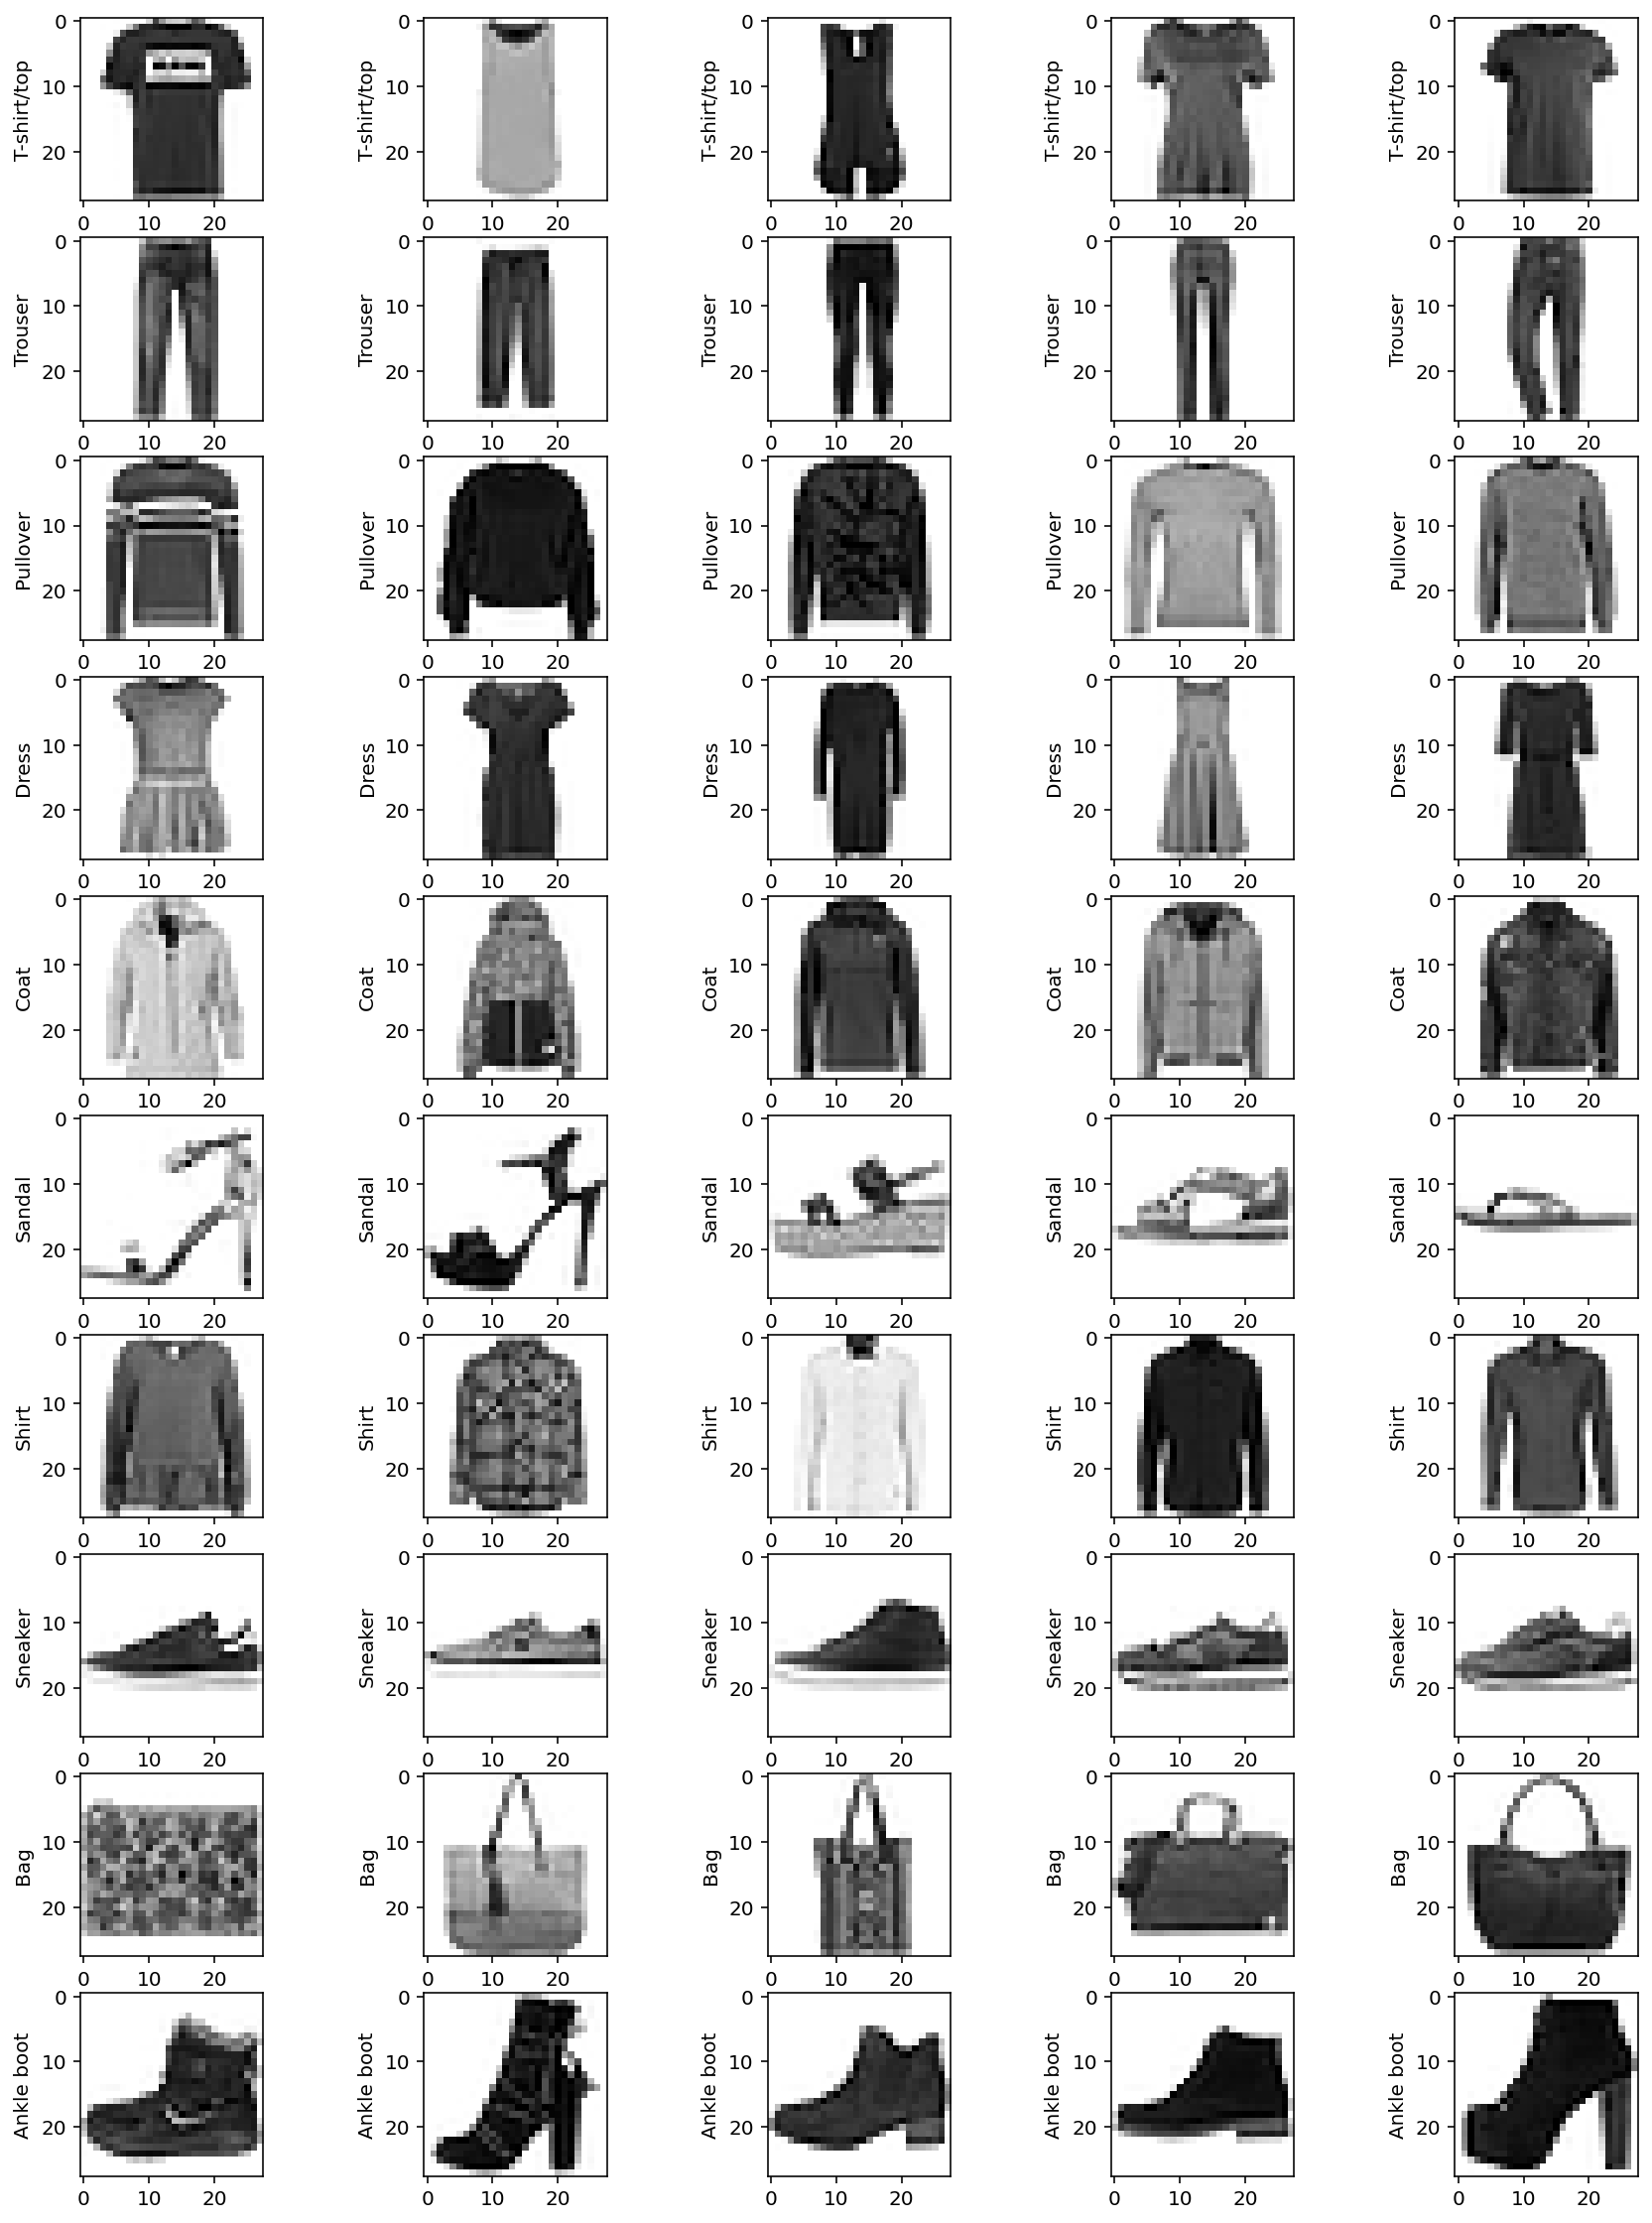

In [6]:
# Plot some images of each class
f, ax = plt.subplots(10, 5, figsize=(15, 20))
for cls in range(10):
    imgs = X_train[np.where(y_train == cls)][:5]  # Pick up 5 images
    for j in range(5):
        ax[cls, j].imshow(imgs[j], cmap=plt.cm.binary)
        ax[cls, j].set_ylabel(class_names[cls])

plt.show()

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [9]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
callbacks = [
    EarlyStopping(monitor="val_loss", min_delta=0, patience=10, verbose=1, mode="min"),
    ModelCheckpoint(filepath="../models/cnn_fashion_mnist.h5", save_best_only=True)]

In [11]:
X_train = X_train.reshape(*X_train.shape, 1)
y_train = keras.utils.to_categorical(y_train, 10)

X_test= X_test.reshape(*X_test.shape, 1)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
X_tr, X_val, y_tr, y_val = train_test_split(
        X_train,
        y_train,
        test_size=0.3,
        random_state=71,
        shuffle=True,
        stratify=y_train,
    )

In [13]:
fit = model.fit(
        X_tr,
        y_tr,
        epochs=1000,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
    )

Epoch 1/1000
1313/1313 [==============================] - 22s 17ms/step - loss: 0.5111 - accuracy: 0.8145 - val_loss: 0.3813 - val_accuracy: 0.8618
Epoch 2/1000
1313/1313 [==============================] - 18s 13ms/step - loss: 0.3417 - accuracy: 0.8769 - val_loss: 0.3263 - val_accuracy: 0.8807
Epoch 3/1000
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2940 - accuracy: 0.8952 - val_loss: 0.3155 - val_accuracy: 0.8853
Epoch 4/1000
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2638 - accuracy: 0.9032 - val_loss: 0.2874 - val_accuracy: 0.8975
Epoch 5/1000
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2396 - accuracy: 0.9112 - val_loss: 0.2805 - val_accuracy: 0.9002
Epoch 6/1000
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2196 - accuracy: 0.9189 - val_loss: 0.2724 - val_accuracy: 0.9042
Epoch 7/1000
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2032 - accuracy: 0.9252 - val_

In [14]:
model = keras.models.load_model("models/cnn_fashion_mnnist.h5")

OSError: SavedModel file does not exist at: models/cnn_fashion_mnnist.h5/{saved_model.pbtxt|saved_model.pb}

In [15]:
model.evaluate(X_tr,  y_tr)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0654 - accuracy: 0.9771


[0.06543175876140594, 0.9771190285682678]

In [16]:
model.evaluate(X_val,  y_val)

563/563 [==============================] - 2s 3ms/step - loss: 0.3411 - accuracy: 0.9109


[0.3411201536655426, 0.9108889102935791]

In [17]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.9081


[0.35521143674850464, 0.9081000089645386]